Estimate clustering structure from vector array.

OPTICS (Ordering Points To Identify the Clustering Structure), closely related to DBSCAN, finds core sample of high density and expands clusters from them [1]. Unlike DBSCAN, keeps cluster hierarchy for a variable neighborhood radius. Better suited for usage on large datasets than the current sklearn implementation of DBSCAN.

Clusters are then extracted using a DBSCAN-like method (cluster_method = ‘dbscan’) or an automatic technique proposed in [1] (cluster_method = ‘xi’).

In [1]:
# class sklearn.cluster.OPTICS(*, min_samples=5, 
#                              max_eps=inf, 
#                              metric='minkowski', 
#                              p=2, 
#                              metric_params=None, 
#                              cluster_method='xi', 
#                              eps=None, 
#                              xi=0.05, 
#                              predecessor_correction=True, 
#                              min_cluster_size=None, 
#                              algorithm='auto', 
#                              leaf_size=30, 
#                              memory=None, 
#                              n_jobs=None)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<function matplotlib.pyplot.show(close=None, block=None)>

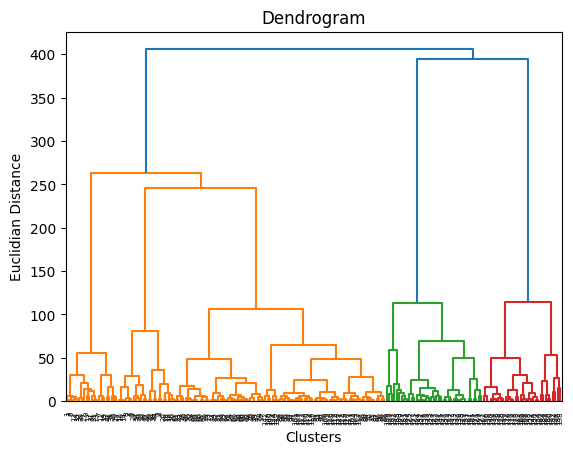

In [5]:
graph=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidian Distance")
plt.show

In [6]:
from sklearn.cluster import OPTICS
optics=OPTICS(min_samples=7)
optics_predict=optics.fit_predict(X)
optics_predict

array([-1,  4,  6,  4, -1,  4,  6, -1,  6,  4,  6, -1,  6,  4,  6,  4, -1,
        4, -1, -1, -1,  4,  6,  4,  6,  4, -1, -1, -1,  4,  6,  4,  6, -1,
       -1,  4, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,
       -1,  0,  0, -1,  0, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1,  2,  1,  3,  2,  3,  3, -1,  2,  2,  3,  2,  3,  2,
       -1, -1, -1,  3,  2,  2,  3,  2,  2, -1,  3,  2,  2,  2,  3, -1, -1,
       -1, -1, -1, -1,  8, -1,  7, -1,  8,  5,  7,  5,  7, -1,  7,  5,  8,
        5,  7,  5,  7,  5,  8, -1,  8,  5,  8, -1,  7, -1,  8,  5,  8,  5,
        7,  5,  8,  5,  7,  5,  7, -1, -1,  5,  8, -1, -1, -1,  8, -1, -1,
       -1, -1,  5,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
supervised=pd.DataFrame(dataset)
supervised['cluster_group']=optics_predict
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,6
3,4,Female,23,16,77,4
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [8]:
supervised.to_csv('Optics_cluster.csv',index=False)

In [9]:
supervised['cluster_group'].value_counts()

cluster_group
-1    98
 4    14
 5    14
 2    13
 0    12
 8    12
 6    10
 7    10
 3     9
 1     8
Name: count, dtype: int64

C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\jayac\AppData\Local\anaconda3\envs\aiml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


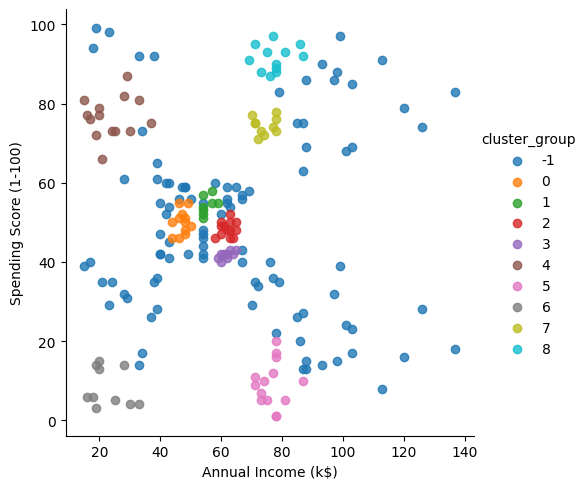

In [10]:
sns_graph=sns.lmplot(data=supervised,
                    x=supervised.columns[3],
                    y=supervised.columns[4],
                    hue=supervised.columns[5],
                    fit_reg=False,
                    legend=True,
                    legend_out=True)